In [27]:
%run src/ZooAnimals.ipynb

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [29]:
file_path = r"C:\Users\Akash Mittal\Documents\Zoo_Lab\zoo.xlsx" #File Path of the Input File with Features of Animals

In [30]:
animal_data = DataProcessor(file_path)

In [31]:
animal_data.import_data() # Imporitng Data

File Read OK.


In [32]:
print(animal_data.data) #Snapshot of Input Data

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
5       buffalo     1         0     0     1         0        0         0   
6          calf     1         0     0     1         0        0         0   
7          carp     0         0     1     0         0        1         0   
8       catfish     0         0     1     0         0        1         1   
9          cavy     1         0     0     1         0        0         0   
10      cheetah     1         0     0     1         0        0         1   
11      chicken     0         1     1     0         1        0         0   
12         c

In [33]:
X = animal_data.data.drop(['class_type'], axis=1) # Dropping the Class_type column

In [34]:
Y = animal_data.data['class_type'] # Target Column for Animal Class 

In [35]:
# animal_data.create_pair_plot() # Creating a PairWise ScatterPlot for the Different Animal Features {Commented Out as it Takes more time to Plot that much graphs}

In [36]:
# Using AffinityPropagation to Cluster the Data Points

In [37]:
#Segregating only Numeric Data for Analysis
X_numeric = X.drop(['animal_name'], axis=1)

In [38]:
#Creating Affinity Object; the damping factor can be between [0.5, 1), preference for exemplars is set None, no preference to any point.
af = AffinityPropagation(damping = 0.7, preference = None)

In [39]:
# Fitting of the Affinity Propagation algorithm
af.fit(X_numeric)

AffinityPropagation(damping=0.7)

In [40]:
#Get the Cluster Centers
cluster_centers = af.cluster_centers_

In [41]:
#Get labels for each data point
labels = af.labels_

In [42]:
# Number of Clusters
n_clusters = len(cluster_centers)
print(n_clusters)

8


In [43]:
# plotting the clusters

In [44]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

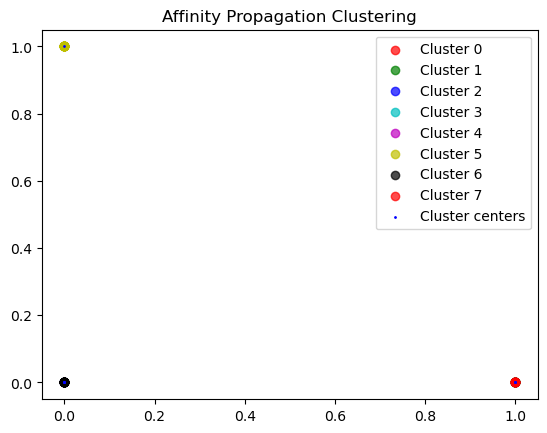

In [45]:
for i in range(n_clusters):
    plt.scatter(X_numeric.values[labels == i, 0], X_numeric.values[labels == i, 1], c=colors[i % len(colors)], alpha=0.70, label='Cluster {}'.format(i))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=1, color='blue', label='Cluster centers')
plt.title('Affinity Propagation Clustering')
plt.legend()
plt.show()

In [46]:
#Labelling the Clusters
unique_labels = np.unique(labels)
for label in unique_labels:
    cluster_size = np.sum(labels == label)
    print(f"Cluster {label}: {cluster_size} data points")

Cluster 0: 15 data points
Cluster 1: 17 data points
Cluster 2: 4 data points
Cluster 3: 13 data points
Cluster 4: 6 data points
Cluster 5: 20 data points
Cluster 6: 19 data points
Cluster 7: 7 data points


In [47]:
# Comparison of Group from Initial Actual Set to Cluster made by Affinity Propagation
# The difference in actual set and the outputs is not part of the project yet, However I will compare the results of the two ML classifiers used, Affinity Propagation and K-Means.

animal_info = animal_data.data[['animal_name', 'class_type']].copy()
animal_info['cluster_label'] = labels
pd.set_option('display.max_rows', None)
print(animal_info)


    animal_name  class_type  cluster_label
0      aardvark           1              1
1      antelope           1              0
2          bass           4              6
3          bear           1              1
4          boar           1              1
5       buffalo           1              0
6          calf           1              0
7          carp           4              6
8       catfish           4              6
9          cavy           1              0
10      cheetah           1              1
11      chicken           2              5
12         chub           4              6
13         clam           7              2
14         crab           7              4
15     crayfish           7              3
16         crow           2              5
17         deer           1              0
18      dogfish           4              6
19      dolphin           1              6
20         dove           2              5
21         duck           2              5
22     elep

In [48]:
# Calculating Silhoutte Score For the Affinity Proparation Algorithm
silhouette_AFP = silhouette_score(X_numeric, labels)
print(f"Silhouette Score Affinity Propagation: {silhouette_AFP}")

Silhouette Score Affinity Propagation: 0.4080231117612951
